## Problem Set 4: Contigent Valuation
_MaCSS 222 Applied Statistics II Spring 2025_   
_Bryan Graham_   
_University of California at Berkeley_      
_March 2025_   
<br>
<br>
The GSI, Jinglin Yang (jinglin.yang@berkeley.edu) will handle the logistics of problem set collection.    

Working with peers on the problem set is actively encouraged, but everyone needs to turn in their own Jupyter Notebook and any other accompanying materials.    

This problem set reviews the material on contingent valuation developed in lecture.

#### Code citation:
<br>
Graham, Bryan S. (2025). "Contigent Valuation Python Juypter Notebook," (Version 1.0) [Computer program]. Available at http://bryangraham.github.io/econometrics/ (Accessed 27 May 2025)
<br>
<br>

In [3]:
# Load libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

The datafiles needed to complete this problem set are available on the course GitHub repository.

In [9]:
data = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Data/'
graphics = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Graphics/'

This problem set uses the dataset described in Whitehead, John C. (2015). "Albemarle–Pamlico Sounds revealed and stated preference data," _Data in Brief_ 3: 90 - 94. A copy of this article can be found online [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4510052/). I encourage you to read this article, as well as the one by Richard Carson provided on bCourses before starting the problem set.   

This survey used a double bounded dichotomous choice method to elicit information on individuals' willingness to pay for a hypothetical water pollution abatement program in the Outer Banks area of North Carolina.    

This first block of code reads in the dataset and prints out the first few rows. For the initial part of the problem set we will work with the **Yes1DK**, **PT1**, **Yes2DK** and **PT2** columns. Each sampled individual was first asked whether they would be willing-to-pay **PT1** for the policy. The value for **PT1** was randomly chosen to be either 100, 200, 300, 400. If they said "No", they were then asked if they would be willing-to-pay half the initially asked about value. If they said "Yes", they were asked if they'd be willing to pay double the initially asked about value. In either case this second value is recorded in **PT2**. We will use the version of the dataset which codes "Don't Know" responses as "No".

In [12]:
AlbemarlePamlico = pd.read_excel (data + 'AlbemarlePamlicoData.xlsx', engine='openpyxl', sheet_name='Data', header = 0)
AlbemarlePamlico[0:5]

,Yes1,Yes1DK,PT1,Yes2,Yes2DK,PT2,Flag,Flagdk,Trips1,Trips2,...,County,Know,Concern,Support,Effect,Pamlico,DP,DA,DN,DF
0,1,1,300,1,1,600,0,0,0,.,...,.,1,3,4,4,1,.,.,.,.
1,2,2,300,2,2,150,1,1,3,3,...,18,2,4,3,3,0,136,161,108,117
2,2,2,400,2,2,200,0,0,0,2,...,35,2,4,4,4,1,173,214,155,96
3,1,1,200,2,2,400,0,0,0,.,...,29,1,4,4,4,1,39,133,39,72
4,2,2,400,2,2,200,1,1,0,0,...,10,2,3,4,3,0,141,182,123,120


## Part 1: Nonparametric estimation of willingness-to-pay

How many disjoint intervals of willingness-to-pay does the survey elicit information about? Assume the lowest possible value of WTP is zero (i.e., no individual would pay for *more* pollution). Using the notation described in lecture what are the $b_l$ values in the set $\mathbb{B}=\left\{ b_{0},b_{1},\cdots,b_{L-1},b_{L}\right\}$? You may write your response in the markdown box below.

### Question 1

Let let $B^{L}_{i}$ be one half the value of **PT1**, $B^{M}_{i}$ exactly the value of **PT1** and $B^{H}_{i}$ twice the value of **PT1**. Let $Y_i$ be a household $i$'s true willingness-to-pay for the pollution abatement project.   

Let $b_j < b_k$ for $j<k$ and $j,k=1,\ldots ,L$. Explain in words the restriction: $ \Pr(B^{L}_{i} \leq Y_{i}\leq B^{M}_{i} | B^{L}_{i} = b_j,  B^{M}_{i} = b_K) = \Pr(b_{j}\leq Y_{i}\leq b_{k})$. What feature of the survey design ensures that this restriction holds? Why? You may write your response in the markdown box below.

### Question 2

Describe how (i) the survey elicits a lower and upper bound on willingness-to-pay for the policy for each sampled individual. The next block of code calculates these two bounds based on the responses to double bounded dichotomous choice answers given by each respondent; (ii) describe the code below and relate it to your answer to (i). You may write your response in the markdown box below.

### Question 3

In [21]:
AlbemarlePamlico["LB"] = -9 
AlbemarlePamlico["UB"] = -9

# lower bound construction
# yes-yes responders
AlbemarlePamlico.loc[(AlbemarlePamlico["Yes1DK"]==1) & (AlbemarlePamlico["Yes2DK"]==1), "LB"] = AlbemarlePamlico["PT2"]

# yes-no responders
AlbemarlePamlico.loc[(AlbemarlePamlico["Yes1DK"]==1) & (AlbemarlePamlico["Yes2DK"]==2), "LB"] = AlbemarlePamlico["PT1"]

# no-yes responders
AlbemarlePamlico.loc[(AlbemarlePamlico["Yes1DK"]==2) & (AlbemarlePamlico["Yes2DK"]==1), "LB"] = AlbemarlePamlico["PT2"]

# no-no responders
AlbemarlePamlico.loc[(AlbemarlePamlico["Yes1DK"]==2) & (AlbemarlePamlico["Yes2DK"]==2), "LB"] = 0

# upper bound construction
# yes-yes responders
AlbemarlePamlico.loc[(AlbemarlePamlico["Yes1DK"]==1) & (AlbemarlePamlico["Yes2DK"]==1), "UB"] = np.inf

# yes-no responders
AlbemarlePamlico.loc[(AlbemarlePamlico["Yes1DK"]==1) & (AlbemarlePamlico["Yes2DK"]==2), "UB"] = AlbemarlePamlico["PT2"]

# no-yes responders
AlbemarlePamlico.loc[(AlbemarlePamlico["Yes1DK"]==2) & (AlbemarlePamlico["Yes2DK"]==1), "UB"] = AlbemarlePamlico["PT1"]

# no-no responders
AlbemarlePamlico.loc[(AlbemarlePamlico["Yes1DK"]==2) & (AlbemarlePamlico["Yes2DK"]==2), "UB"] = AlbemarlePamlico["PT2"]

Here is a list of the first ten lower and upper bounds on willingness-to-pay.

In [24]:
AlbemarlePamlico[["LB","UB"]][0:10]

,LB,UB
0,600,inf
1,0,150
2,0,200
3,200,400
4,0,200
5,200,inf
6,0,150
7,150,300
8,200,400
9,0,200


What is this next block of code doing? Why is it important for our ultimate goal of constructing an estimate of the CDF of willingness-to-pay for the policy?  Describe in words, what the first three rows of the matrix printed out below say about the corresponding respondent's willingness-to-pay for the policy. You may write your response in the markdown box below.

### Question 4

In [28]:
AlbemarlePamlico["D1"] = ((AlbemarlePamlico["LB"]<=0)   & (AlbemarlePamlico["UB"]>=50)     )*1
AlbemarlePamlico["D2"] = ((AlbemarlePamlico["LB"]<=50)  & (AlbemarlePamlico["UB"]>=100)    )*1
AlbemarlePamlico["D3"] = ((AlbemarlePamlico["LB"]<=100) & (AlbemarlePamlico["UB"]>=150)    )*1
AlbemarlePamlico["D4"] = ((AlbemarlePamlico["LB"]<=150) & (AlbemarlePamlico["UB"]>=200)    )*1
AlbemarlePamlico["D5"] = ((AlbemarlePamlico["LB"]<=200) & (AlbemarlePamlico["UB"]>=300)    )*1
AlbemarlePamlico["D6"] = ((AlbemarlePamlico["LB"]<=300) & (AlbemarlePamlico["UB"]>=400)    )*1
AlbemarlePamlico["D7"] = ((AlbemarlePamlico["LB"]<=400) & (AlbemarlePamlico["UB"]>=600)    )*1
AlbemarlePamlico["D8"] = ((AlbemarlePamlico["LB"]<=600) & (AlbemarlePamlico["UB"]>=800)    )*1
AlbemarlePamlico["D9"] = ((AlbemarlePamlico["LB"]<=800) & (AlbemarlePamlico["UB"]>=np.inf) )*1
AlbemarlePamlico[["D1","D2","D3","D4","D5","D6","D7","D8","D9"]][0:10]

,D1,D2,D3,D4,D5,D6,D7,D8,D9
0,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0
4,1,1,1,1,0,0,0,0,0
5,0,0,0,0,1,1,1,1,1
6,1,1,1,0,0,0,0,0,0
7,0,0,0,1,1,0,0,0,0
8,0,0,0,0,1,1,0,0,0
9,1,1,1,1,0,0,0,0,0


Let $F=(F(b_1),F(b_2),\dots,F(b_{L-1}))'$ be the willingness-to-pay CDF values at the $L-1$ interior WTP values for which the survey elicits information. We will assume that $F(0)=0$ and $F(\infty)=1$. The next block of code defines a function which computes $\mathbb{E}\left[\left.\mathbf{1}\left(b_{l}\leq Y_{i}\leq b_{l-1}\right)\right|D, F\right]$ given the data matrix $D$, defined above, and a given set of CDF values $F$. Describe the logic of this function formally. What are its inputs and outputs? Next describe how the function performs the stated calculation. You may write your response in the markdown box below.

### Question 5

In [32]:
def E_Step(F, D):
    
    """
    F : (F(b1),F(b2),...,F(bL)) willingness-to-pay CDF values, numpy (L-1,) array
    D : N x L matrix of indicators for WTP
    """
    
    L = len(F) + 1           # number of disjoint intervals 
           
    F_star = list(F)         # add 0 and 1 to list of CDF values
    F_star.insert(0,0)
    F_star.append(1)
    
    F_dif = []               # compute probability assigned to each of the l=1,..,L WTP intervals      
                             # given current value of F
    for l in range(L):
        F_dif.append(F_star[l+1] - F_star[l])     
    
    delta_0  = D * F_dif         # N x L matrix with numerator values for delta_il, i = 1,..,N, l = 1,...,L
    delta_1  = D @ F_dif         # N - vector with denominator values for delta_il, i = 1,..,N
        
    delta = delta_0.T / delta_1  # L x N matrix with posterior probability that each of the i = 1,..,N, 
                                 # units is in the l = 1,...,L bins given the data and current value of F
    return delta.T          

The next block of code uses Turnbull's method to compute "self-consistent" estimates of $F=(F(b_1),F(b_2),\dots,F(b_{L-1}))'$. Describe the logic of Turnbull's method carefully and discuss how the block of code below operationalizes it. You may write your response in the markdown box below.

### Question 6

In [36]:
# Selection subset of data which asks only about Pamlico, also drop rows with missing response
sample_mask = (AlbemarlePamlico["Yes1DK"] != ".") & (AlbemarlePamlico["Yes2DK"] != ".") \
                                                  & (AlbemarlePamlico["Pamlico"] ==1)
D = AlbemarlePamlico[["D1","D2","D3","D4","D5","D6","D7","D8","D9"]][sample_mask] 

# starting values for Turnbull algorithm
F_start = np.array([0.065, 0.19, 0.315, 0.44, 0.565, 0.69, 0.815, 0.94])

finished  = False
converged = False
xtol      = 0.0001
maxiter   = 1000

iter = 0  # initialize iteration counter

while not converged:

    # Print optimization output to screen
    if (iter > 0): 
        print("Iteration = "       + "%.0f" % iter + \
              ",  2-norm of change in F = " + "%.6f" % epsilon)
    
    
    # ----------------------------------------------------------------------#
    # - E-Step: Compute posterior unit-specific WTP bin probabilities      -#
    # ----------------------------------------------------------------------#
    
    delta = E_Step(F_start, D)
    
    # ----------------------------------------------------------------------#
    # - M-Step: Update estimates of WTP distribution.                      -#
    # ----------------------------------------------------------------------#
    
    F_em = np.cumsum(np.mean(delta))[0:-1]
   
    # Assess convergence 
    epsilon = np.linalg.norm(F_start-F_em)
    
    if (epsilon < xtol) | (iter >= maxiter):
            finished = True
            if (epsilon < xtol):
                converged = True
        
    # Update parameters
    F_start = F_em
    iter += 1

/Users/bgraham/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Iteration = 1,  2-norm of change in F = 0.666313
Iteration = 2,  2-norm of change in F = 0.100312
Iteration = 3,  2-norm of change in F = 0.041676
Iteration = 4,  2-norm of change in F = 0.019775
Iteration = 5,  2-norm of change in F = 0.010169
Iteration = 6,  2-norm of change in F = 0.005658
Iteration = 7,  2-norm of change in F = 0.003453
Iteration = 8,  2-norm of change in F = 0.002343
Iteration = 9,  2-norm of change in F = 0.001756
Iteration = 10,  2-norm of change in F = 0.001419
Iteration = 11,  2-norm of change in F = 0.001205
Iteration = 12,  2-norm of change in F = 0.001059
Iteration = 13,  2-norm of change in F = 0.000955
Iteration = 14,  2-norm of change in F = 0.000877
Iteration = 15,  2-norm of change in F = 0.000819
Iteration = 16,  2-norm of change in F = 0.000774
Iteration = 17,  2-norm of change in F = 0.000739
Iteration = 18,  2-norm of change in F = 0.000710
Iteration = 19,  2-norm of change in F = 0.000686
Iteration = 20,  2-norm of change in F = 0.000666
Iteration

These next two blocks of code print out the CDF estimates. As well as the associated estimates of the survivor function for WTP. A plot of the estimated survivor function is also provided.

In [39]:
F_em = list(F_em)
F_em.insert(0,0)
data_em = {"wtp" : [0, 50, 100, 150, 200, 300, 400, 600, 800], "F(y)" : F_em}
WTP_em = pd.DataFrame.from_dict(data_em)
WTP_em['S(wtp)'] = 1 - WTP_em['F(y)'] 

print(WTP_em)

   wtp      F(y)    S(wtp)
0    0  0.000000  1.000000
1   50  0.430354  0.569646
2  100  0.565112  0.434888
3  150  0.655933  0.344067
4  200  0.755858  0.244142
5  300  0.762663  0.237337
6  400  0.888954  0.111046
7  600  0.972698  0.027302
8  800  0.991105  0.008895


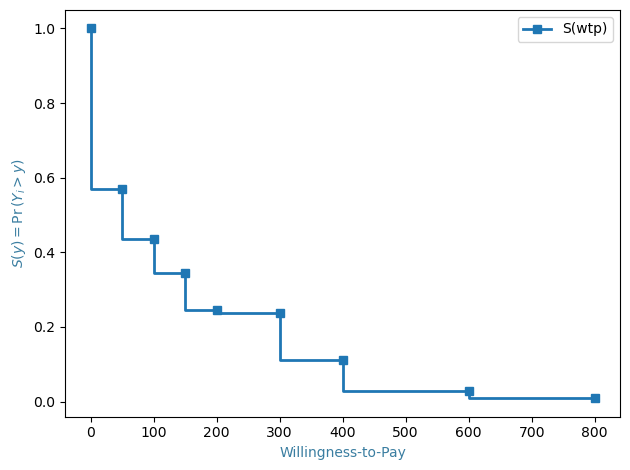

In [41]:
# Plot estimate WTP survivor function
fig_wtp_cdf, ax = plt.subplots()


WTP_em.plot(x="wtp",y="S(wtp)", drawstyle="steps", style='s-', linewidth=2, ax=ax)
color = '#3B7EA1' # Founder's Rock
ax.set_xlabel('Willingness-to-Pay', color=color)
ax.set_ylabel(r'$S(y)=\Pr\left(Y_{i}>y\right)$', color=color)
ax.set_xticks([0,100,200,300,400,500,600,700,800])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])

fig_wtp_cdf.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(graphics + 'fig_wtp_cdf', bbox_inches='tight', dpi=500) 

Discuss the Turnbull estimate of the WTP survivor function. What is the median willingness-to-pay for the pollution abatement project? Based on the above estimates, how might you redesign the specific double bounded dichotomous choice procedure used by the researchers to get "better" information about the distribution of willingness-to-pay in the population? Change the starting values used in the Turnbull procedure. Does your estimate of the WTP survivor function change?

## Part 2: Parametric estimation of willingness-to-pay

This next portion of the problem set is more open ended. Using the same "Pamlico only" subsample do the following:    

1. Specify a parametric "Logit" model for willingness-to-pay (WTP). This model should allow for (WTP) to depend on some respondent attributes.

2. Pick at least two respondent attributes to include in your WTP model. Discuss why you chose to include these attributes.

3. Find the maximum likelihood estimates of the parameters indexing your WTP model. Does WTP significantly vary with the household attributes you chose to include in your model?

4. Use you estimated model to construct an estimate of the unconditional CDF of WTP at 50, 100, 150, 200, 300, 400, 600 and 800. Plot this estimate and compare it to the Turnbull estimate computed above. Compare the two estimates.

5. Discuss some of the advantages and disadvantages of parametric contingent valuation relative to the "nonparametric" approach taken in part 1.

6. Please include all code, results and discussion (in markdown boxes) as additions to this notebook.

## Part 3: Reflection

Read the three articles in the 2012 *Journal of Economic Perspectives* symposium on contingent valuation. They can be found online [here](https://www.aeaweb.org/issues/288). Write a five paragraph reaction to the arguments made in the symposium. Do you feel as though contingent valuation has a role to play in public policy and/or legal decision-making? You may write your response in a markdown box below.